In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.models import load_model #save and load models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import average_precision_score
import tensorflow.keras.backend as k

2025-01-23 15:17:53.022287: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-23 15:17:53.022751: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 15:17:53.024921: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 15:17:53.030996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737656273.041191 3277142 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737656273.04

In [2]:
df = pd.read_csv('data/adult.data',  names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

In [3]:
df1 = pd.read_csv("data/adult.test",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',\
        na_values="?")

In [4]:
data = pd.concat([df, df1], ignore_index= True)

In [5]:
names_cloud = data.columns.tolist()
print(names_cloud)
X = np.array(data[names_cloud])
print(X.shape)

['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target']
(48842, 15)


In [6]:
y = (data['Target'].map({"<=50K":0,">50K":1})).values
print(pd.value_counts(pd.Series(y)))
data.drop('Target',axis=1, inplace =True,)

0    37155
1    11687
Name: count, dtype: int64


/tmp/ipykernel_3277142/3481380141.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(pd.Series(y)))


In [7]:
categorical_features = data.select_dtypes(include=['object']).columns
print(categorical_features)
ohc_category = ['Workclass', 'Education', 'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
df_ohc = pd.get_dummies(data, columns = ohc_category)
print(df_ohc.shape)
df_ohc.head()

Index(['Workclass', 'Education', 'Martial Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Country'],
      dtype='object')
(48842, 105)


,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,...,Country_Portugal,Country_Puerto-Rico,Country_Scotland,Country_South,Country_Taiwan,Country_Thailand,Country_Trinadad&Tobago,Country_United-States,Country_Vietnam,Country_Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [8]:
names_x = df_ohc.columns.tolist()
print("Target Variable: Target")
print("Predictors: "+str(names_x))
x = np.array(df_ohc[names_x])
print("Number of data samples : {0:d}".format(x.shape[0]))
print("Number of Predictor Features : {0:d}".format(x.shape[1]))

Target Variable: Target
Predictors: ['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Workclass_Federal-gov', 'Workclass_Local-gov', 'Workclass_Never-worked', 'Workclass_Private', 'Workclass_Self-emp-inc', 'Workclass_Self-emp-not-inc', 'Workclass_State-gov', 'Workclass_Without-pay', 'Education_10th', 'Education_11th', 'Education_12th', 'Education_1st-4th', 'Education_5th-6th', 'Education_7th-8th', 'Education_9th', 'Education_Assoc-acdm', 'Education_Assoc-voc', 'Education_Bachelors', 'Education_Doctorate', 'Education_HS-grad', 'Education_Masters', 'Education_Preschool', 'Education_Prof-school', 'Education_Some-college', 'Martial Status_Divorced', 'Martial Status_Married-AF-spouse', 'Martial Status_Married-civ-spouse', 'Martial Status_Married-spouse-absent', 'Martial Status_Never-married', 'Martial Status_Separated', 'Martial Status_Widowed', 'Occupation_Adm-clerical', 'Occupation_Armed-Forces', 'Occupation_Craft-repair', 'Occupation_Exec-managerial', 

## MOdelo Alvo ORiginal

In [9]:
x = x.astype('float32')
scaler = MinMaxScaler()

x = scaler.fit_transform(x)


data_size = 10000
ns = 5 #number of shadow models for one data_size

nout = 1
seed = 7
np.random.seed(seed)
sh = np.arange(x.shape[0])
np.random.shuffle(sh)
target_rep = np.zeros((1,x.shape[0]))
target_rep[0,:] = sh
print(sh)

[23509 38928 23796 ...   919 38467 10742]


In [10]:
k.clear_session()

xtr_target = x[sh[:data_size]]
ytr_target = y[sh[:data_size]]
xts_target = x[sh[data_size:data_size*2]]
yts_target = y[sh[data_size:2*data_size]]

shadow_rep = np.zeros((5,x.shape[0]-2*data_size))
sh1 = sh[2*data_size:]
xtr_att = np.zeros((2*data_size*ns,1))
ytr_att = np.zeros((2*data_size*ns,1))
xtr_att_truelabels = np.zeros((2*data_size*ns,))

model_target = Sequential()
model_target.add(Dense(5, input_shape =(x.shape[1],), activation='sigmoid', name = 'hidden'))
model_target.add(Dense(1, activation='sigmoid', name = 'output'))
opt = keras.optimizers.Adam(learning_rate=0.001, decay = 1e-7)
model_target.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

print(model_target.summary())

hist_target = model_target.fit(xtr_target, ytr_target,
                  batch_size = 32,
                  epochs = 100,
                  validation_data=(xts_target, yts_target), shuffle=True, verbose=0)

print('\n\nFor target model with training datasize = %d'%data_size)
print('Training accuracy = %f'%hist_target.history['accuracy'][-1])
print('Validation accuracy = %f'%hist_target.history['val_accuracy'][-1])

model_target_name = 'UCI_Adult_target_'+str(data_size)+'.h5'

model_target.save(model_target_name)

ytemp_tr_target = model_target.predict(xtr_target)
ytemp_ts_target = model_target.predict(xts_target)

xts_att = np.vstack((ytemp_tr_target,ytemp_ts_target))
yts_att = np.zeros((2*data_size,1))
yts_att[data_size:2*data_size] = 1
xts_att_truelabels = np.vstack((ytr_target,yts_target))
xts_att_dict = {'xts_att':xts_att,'yts_att':yts_att,'xts_att_truelabels':xts_att_truelabels}

fname = './att_test_data_'+str(data_size)
np.save(fname,xts_att_dict)
datafile = './data_adult_target_'+str(data_size)
np.save(datafile,target_rep)

/media/emanuel/sdd_sata/projetos/projeto_mestrado_ofc/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1737656278.160485 3277142 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/media/emanuel/sdd_sata/projetos/projeto_mestrado_ofc/.venv/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 5)              │           530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536 (2.09 KB)

 Trainable params: 536 (2.09 KB)

 Non-trainable params: 0 (0.00 B)

None




For target model with training datasize = 10000
Training accuracy = 0.849500
Validation accuracy = 0.850500
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step


## Modelo Sombra Original

In [11]:
for i in np.arange(ns):

    np.random.shuffle(sh1)
    shadow_rep[i,:] = sh1
    
    xtr_shadow = x[sh1[:data_size]]
    ytr_shadow = y[sh1[:data_size]]
    xts_shadow = x[sh1[data_size:2*data_size]]
    yts_shadow = y[sh1[data_size:2*data_size]]

    model_shadow = Sequential()
    model_shadow.add(Dense(5, input_shape =(x.shape[1],), activation='sigmoid', name = 'hidden'))
    model_shadow.add(Dense(1, activation='sigmoid', name = 'output'))
    opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-7)
    model_shadow.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    if i == 0:
        print("Shadow Model Summary")
        print(model_shadow.summary())
        
    hist_shadow = model_shadow.fit(xtr_shadow, ytr_shadow,
                  batch_size = 32,
                  epochs = 100,
                  validation_data=(xts_shadow, yts_shadow), shuffle=True, verbose=0)
    
    print("Shadow model no: %d"%i)
    print('\n\nFor shadow model with training datasize = %d'%data_size)
    print('Training accuracy = %f'%hist_shadow.history['accuracy'][-1])
    print('Validation accuracy = %f'%hist_shadow.history['val_accuracy'][-1])

    ytemp11 = model_shadow.predict(xtr_shadow)
    ytemp22 = model_shadow.predict(xts_shadow)

    model_shadow_name = 'UCI_Adult_shadow_'+str(data_size)+'_'+str(i)+'.h5'
    print(model_shadow_name)
    model_shadow.save(model_shadow_name)

    xtr_att[i*2*data_size:(i+1)*2*data_size] = np.vstack((ytemp11,ytemp22))
    ytr_att[((i*2)+1)*data_size:(i+1)*2*data_size] = 1
    xtr_att_truelabels[i*2*data_size:(i+1)*2*data_size] = np.hstack((ytr_shadow,yts_shadow))

datafile = './data_adult_shadow_'+str(data_size)
np.save(datafile,shadow_rep)
xtr_att_dict = {'xtr_att':xtr_att,'ytr_att':ytr_att,'xtr_att_truelabels':xtr_att_truelabels}
fname = './att_train_data_'+str(data_size)
np.save(fname,xtr_att_dict)

Shadow Model Summary


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 5)              │           530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536 (2.09 KB)

 Trainable params: 536 (2.09 KB)

 Non-trainable params: 0 (0.00 B)

None
Shadow model no: 0


For shadow model with training datasize = 10000
Training accuracy = 0.854900
Validation accuracy = 0.851700
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step


UCI_Adult_shadow_10000_0.h5
Shadow model no: 1


For shadow model with training datasize = 10000
Training accuracy = 0.859200
Validation accuracy = 0.850100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step


UCI_Adult_shadow_10000_1.h5
Shadow model no: 2


For shadow model with training datasize = 10000
Training accuracy = 0.859800
Validation accuracy = 0.848100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step


UCI_Adult_shadow_10000_2.h5
Shadow model no: 3


For shadow model with training datasize = 10000
Training accuracy = 0.863100
Validation accuracy = 0.846100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step


UCI_Adult_shadow_10000_3.h5
Shadow model no: 4


For shadow model with training datasize = 10000
Training accuracy = 0.856900
Validation accuracy = 0.849900
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step


UCI_Adult_shadow_10000_4.h5


## Modelo de Ataque

In [12]:
model_attack = Sequential()
model_attack.add(Dense(5, input_shape = (xtr_att.shape[1],), activation='sigmoid', name = 'hidden'))
model_attack.add(Dense(1, activation='sigmoid', name = 'output'))
opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-7)

model_attack.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

print("Attack Model Summary")
print(model_attack.summary())

hist_attack = model_attack.fit(xtr_att, ytr_att,
                  batch_size = 32,
                  epochs = 100,
                  validation_data=(xts_att, yts_att), shuffle=True, verbose=0)

print('\n\nFor attack model with training datasize = %d'%xtr_att.shape[0])
print('Training accuracy = %f'%hist_attack.history['accuracy'][-1])
print('Validation accuracy = %f'%hist_attack.history['val_accuracy'][-1])

y_score = model_attack.predict(xts_att)
average_precision = average_precision_score(yts_att, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Attack Model Summary


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

None


For attack model with training datasize = 100000
Training accuracy = 0.497580
Validation accuracy = 0.500000
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step
Average precision-recall score: 0.50


## COmbinando amostras entre alvo e sombras no conjunto de teste do ataque

In [13]:
# # First, collect predictions from both target and shadow models for test set
# # Assuming we want to use 20% of each shadow model's predictions in the test set

# Calculate how many samples we want from each shadow model
shadow_samples_per_model = int(0.2 * data_size)  # 20% of data_size
total_shadow_samples = shadow_samples_per_model * ns  # ns is number of shadow models

# Initialize arrays for combined test set
xts_att_combined = np.zeros((2*data_size + total_shadow_samples, 1))
yts_att_combined = np.zeros((2*data_size + total_shadow_samples, 1))
xts_att_truelabels_combined = np.zeros((2*data_size + total_shadow_samples,))

# First, add all target model predictions
xts_att_combined[:2*data_size] = np.vstack((ytemp_tr_target, ytemp_ts_target))
yts_att_combined[:data_size] = 0  # members (target train)
yts_att_combined[data_size:2*data_size] = 1  # non-members (target test)
xts_att_truelabels_combined[:2*data_size] = np.hstack((ytr_target, yts_target))

# Then add portions of shadow model predictions
current_index = 2*data_size

for i in np.arange(ns):
    # Load or get predictions from each shadow model
    model_shadow = load_model(f'UCI_Adult_shadow_{data_size}_{i}.h5')

    # Get predictions from shadow model
    shadow_tr_preds = model_shadow.predict(xtr_shadow)  # predictions on shadow train data
    shadow_ts_preds = model_shadow.predict(xts_shadow)  # predictions on shadow test data

    # Randomly select samples from both train and test predictions
    combined_preds = np.vstack((shadow_tr_preds, shadow_ts_preds))
    combined_labels = np.hstack((np.zeros(data_size), np.ones(data_size)))  # 0 for members, 1 for non-members
    combined_true_labels = np.hstack((ytr_shadow, yts_shadow))

    # Randomly select indices
    random_indices = np.random.choice(2*data_size, shadow_samples_per_model, replace=False)

    # Add selected predictions and their labels to test set
    end_index = current_index + shadow_samples_per_model
    xts_att_combined[current_index:end_index] = combined_preds[random_indices].reshape(-1, 1)
    yts_att_combined[current_index:end_index] = combined_labels[random_indices].reshape(-1, 1)
    xts_att_truelabels_combined[current_index:end_index] = combined_true_labels[random_indices]

    current_index = end_index

# Save the combined test data
xts_att_dict = {
    'xts_att': xts_att_combined,
    'yts_att': yts_att_combined,
    'xts_att_truelabels': xts_att_truelabels_combined
}
fname = f'./att_test_data_combined_{data_size}'
np.save(fname, xts_att_dict)


hist_attack = model_attack.fit(xtr_att, ytr_att,
                             batch_size=32,
                             epochs=100,
                             validation_data=(xts_att_combined, yts_att_combined),
                             shuffle=True, verbose=0)


print('\n\nFor attack model with training datasize = %d' % xtr_att.shape[0])
print('Training accuracy = %f' % hist_attack.history['accuracy'][-1])
print('Validation accuracy = %f' % hist_attack.history['val_accuracy'][-1])
y_score = model_attack.predict(xts_att_combined)
average_precision = average_precision_score(yts_att_combined, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step


For attack model with training datasize = 100000
Training accuracy = 0.501450
Validation accuracy = 0.500267
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step
Average precision-recall score: 0.50


In [14]:
for key, value in xts_att_dict.items():
  print(f'{key}: {len(value)}')

xts_att: 30000
yts_att: 30000
xts_att_truelabels: 30000


In [14]:
# Create a structured array to store predictions and metadata
test_set_data = []

# Add target model predictions with metadata
for idx in range(len(ytemp_tr_target)):
    test_set_data.append({
        'prediction': float(ytemp_tr_target[idx]),
        'is_member': 0,  # member of training set
        'true_label': int(ytr_target[idx]),
        'model_name': 'target',
        'sample_index': idx,
        'data_split': 'train'
    })

for idx in range(len(ytemp_ts_target)):
    test_set_data.append({
        'prediction': float(ytemp_ts_target[idx]),
        'is_member': 1,  # non-member (test set)
        'true_label': int(yts_target[idx]),
        'model_name': 'target',
        'sample_index': idx,
        'data_split': 'test'
    })

# Calculate samples to take from each shadow model
shadow_samples_per_model = int(0.2 * data_size)  # 20% of data_size

# Add shadow model predictions with metadata
for i in np.arange(ns):
    model_shadow = load_model(f'UCI_Adult_shadow_{data_size}_{i}.h5')
    
    # Get predictions from shadow model
    shadow_tr_preds = model_shadow.predict(xtr_shadow)
    shadow_ts_preds = model_shadow.predict(xts_shadow)
    
    # Randomly select indices from both train and test sets
    train_indices = np.random.choice(len(shadow_tr_preds), 
                                   shadow_samples_per_model // 2, 
                                   replace=False)
    test_indices = np.random.choice(len(shadow_ts_preds), 
                                  shadow_samples_per_model // 2, 
                                  replace=False)
    
    # Add selected training samples
    for idx in train_indices:
        test_set_data.append({
            'prediction': float(shadow_tr_preds[idx]),
            'is_member': 0,  # member of training set
            'true_label': int(ytr_shadow[idx]),
            'model_name': f'shadow_{i}',
            'sample_index': idx,
            'data_split': 'train'
        })
    
    # Add selected test samples
    for idx in test_indices:
        test_set_data.append({
            'prediction': float(shadow_ts_preds[idx]),
            'is_member': 1,  # non-member (test set)
            'true_label': int(yts_shadow[idx]),
            'model_name': f'shadow_{i}',
            'sample_index': idx,
            'data_split': 'test'
        })

# Convert to pandas DataFrame for easier handling
test_set_df = pd.DataFrame(test_set_data)

# Create arrays for attack model
xts_att_combined = test_set_df['prediction'].values.reshape(-1, 1)
yts_att_combined = test_set_df['is_member'].values.reshape(-1, 1)
xts_att_truelabels_combined = test_set_df['true_label'].values

# Save both the structured DataFrame and the arrays
test_set_dict = {
    'xts_att': xts_att_combined,
    'yts_att': yts_att_combined,
    'xts_att_truelabels': xts_att_truelabels_combined,
    'metadata': test_set_df
}
fname = f'./att_test_data_tracked_{data_size}'
np.save(fname, test_set_dict)

# Train attack model with new test set
hist_attack = model_attack.fit(xtr_att, ytr_att,
                             batch_size=32,
                             epochs=100,
                             validation_data=(xts_att_combined, yts_att_combined),
                             shuffle=True, verbose=0)

# Example analysis using the metadata
print("\nTest Set Summary:")
print("\nSamples per model:")
print(test_set_df.groupby('model_name').size())

print("\nMember/Non-member distribution:")
print(test_set_df.groupby(['model_name', 'is_member']).size().unstack())

# Function to analyze attack model performance by source
def analyze_performance_by_source(attack_model, test_set_df):
    predictions = attack_model.predict(test_set_df['prediction'].values.reshape(-1, 1))
    test_set_df['attack_prediction'] = predictions
    
    print("\nPerformance Analysis by Source:")
    for model_name in test_set_df['model_name'].unique():
        model_data = test_set_df[test_set_df['model_name'] == model_name]
        acc = ((model_data['attack_prediction'].round() == model_data['is_member']).mean())
        print(f"\n{model_name}:")
        print(f"Accuracy: {acc:.3f}")
        
        # Confusion matrix per model
        members_correct = ((model_data['attack_prediction'].round() == model_data['is_member']) & 
                         (model_data['is_member'] == 0)).sum()
        nonmembers_correct = ((model_data['attack_prediction'].round() == model_data['is_member']) & 
                            (model_data['is_member'] == 1)).sum()
        print(f"Correctly identified members: {members_correct}")
        print(f"Correctly identified non-members: {nonmembers_correct}")

# Run performance analysis
analyze_performance_by_source(model_attack, test_set_df)

/tmp/ipykernel_3277142/1860021247.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'prediction': float(ytemp_tr_target[idx]),
/tmp/ipykernel_3277142/1860021247.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'prediction': float(ytemp_ts_target[idx]),


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step


/tmp/ipykernel_3277142/1860021247.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'prediction': float(shadow_tr_preds[idx]),
/tmp/ipykernel_3277142/1860021247.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'prediction': float(shadow_ts_preds[idx]),


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step

Test Set Summary:

Samples per model:
model_name
shadow_0     2000
shadow_1     2000
shadow_2     2000
shadow_3     2000
shadow_4     2000
target      20000
dtype: int64

Member/Non-member distribution:
is_member       0      1
model_name              
shadow_0     1000   1000
shadow_1     1000   1000
shadow_2     1000   1000
shadow_3     1000   1000
shadow_4     1000   1000
target      10000  10000
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step

Performance Analysis by Source:

target:
Accuracy: 0.500
Correctly identified members: 10000
Correctly identified non-members: 0

shadow_0:
Accuracy: 0.500
Correctly identified members: 1000
Correctly identified non-members: 0

shadow_1:
Accuracy: 0.500
Correctly identified members: 1000
Correctly identified non-members: 0

shadow_2:
Accuracy: 0.500
Correctly identified members: 1000
Correctly identified non-members: 0

shadow_3:
Accuracy: 0.500
Correctly identi

In [17]:
xts_att_combined.shape

(30000, 1)

## SHAP

In [15]:
import shap

# Assuming you have a trained attack model (`model_attack`) and the `test_set_df` DataFrame

# Calculate SHAP values
explainer = shap.DeepExplainer(model_attack, xtr_att) 
shap_values = explainer.shap_values(xts_att_combined) 

/media/emanuel/sdd_sata/projetos/projeto_mestrado_ofc/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/media/emanuel/sdd_sata/projetos/projeto_mestrado_ofc/.venv/lib/python3.12/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/media/emanuel/sdd_sata/projetos/projeto_mestrado_ofc/.venv/lib/python3.12/site-packages/shap/explainers/_deep/deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance

In [16]:
test_set_df['shap_value'] = shap_values[:, 0] 
test_set_df

,prediction,is_member,true_label,model_name,sample_index,data_split,attack_prediction,shap_value
0,0.545927,0,1,target,0,train,0.488961,0.001298
1,0.655772,0,0,target,1,train,0.489735,0.002071
2,0.580456,0,0,target,2,train,0.489201,0.001537
3,0.053128,0,0,target,3,train,0.486677,-0.000987
4,0.592701,0,1,target,4,train,0.489287,0.001623
...,...,...,...,...,...,...,...,...
29995,0.404607,1,0,shadow_4,7543,test,0.488029,0.000365
29996,0.044434,1,0,shadow_4,2179,test,0.486687,-0.000977
29997,0.081991,1,0,shadow_4,1110,test,0.486670,-0.000993
29998,0.001895,1,0,shadow_4,3481,test,0.486799,-0.000865


In [17]:
# Filter for target model predictions
target_model_data = test_set_df[test_set_df['model_name'] == 'target']
target_model_data

,prediction,is_member,true_label,model_name,sample_index,data_split,attack_prediction,shap_value
0,0.545927,0,1,target,0,train,0.488961,0.001298
1,0.655772,0,0,target,1,train,0.489735,0.002071
2,0.580456,0,0,target,2,train,0.489201,0.001537
3,0.053128,0,0,target,3,train,0.486677,-0.000987
4,0.592701,0,1,target,4,train,0.489287,0.001623
...,...,...,...,...,...,...,...,...
19995,0.001714,1,0,target,9995,test,0.486800,-0.000864
19996,0.003978,1,0,target,9996,test,0.486791,-0.000873
19997,0.029273,1,0,target,9997,test,0.486714,-0.000950
19998,0.058809,1,0,target,9998,test,0.486672,-0.000991


In [18]:
# Filter for a specific shadow model (e.g., shadow_0)
shadow_model_data = test_set_df[test_set_df['model_name'] == 'shadow_0']
shadow_model_data

,prediction,is_member,true_label,model_name,sample_index,data_split,attack_prediction,shap_value
20000,0.054826,0,1,shadow_0,661,train,0.486675,-0.000988
20001,0.001987,0,0,shadow_0,7922,train,0.486799,-0.000865
20002,0.012932,0,0,shadow_0,5974,train,0.486759,-0.000905
20003,0.035402,0,0,shadow_0,5661,train,0.486701,-0.000962
20004,0.185764,0,0,shadow_0,9250,train,0.486896,-0.000768
...,...,...,...,...,...,...,...,...
21995,0.028440,1,0,shadow_0,4681,test,0.486716,-0.000948
21996,0.021830,1,0,shadow_0,1838,test,0.486732,-0.000931
21997,0.597528,1,1,shadow_0,5406,test,0.489321,0.001657
21998,0.010876,1,0,shadow_0,7373,test,0.486766,-0.000898


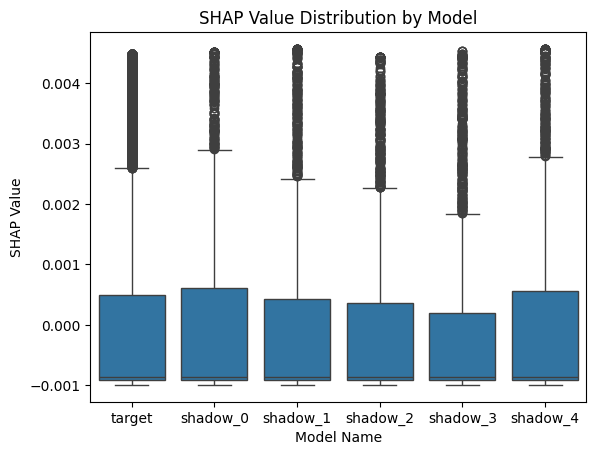

In [21]:
import seaborn as sns

# Plot distribution of SHAP values for each model
sns.boxplot(x='model_name', y='shap_value', data=test_set_df)
plt.title('SHAP Value Distribution by Model')
plt.ylabel('SHAP Value')
plt.xlabel('Model Name')
plt.show()


In [22]:
# Separate high SHAP value predictions for members vs non-members
member_contributors = test_set_df[(test_set_df['is_member'] == 0) & (test_set_df['shap_value'] > 0.5)]
nonmember_contributors = test_set_df[(test_set_df['is_member'] == 1) & (test_set_df['shap_value'] > 0.5)]

print(f"High SHAP contributors for members: {len(member_contributors)}")
print(f"High SHAP contributors for non-members: {len(nonmember_contributors)}")


High SHAP contributors for members: 0
High SHAP contributors for non-members: 0


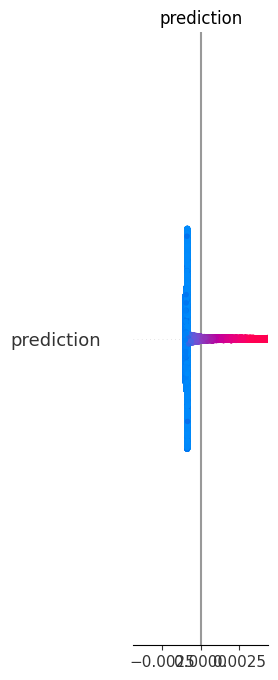

In [24]:
shap.summary_plot(shap_values, xts_att_combined, feature_names=test_set_df.columns)


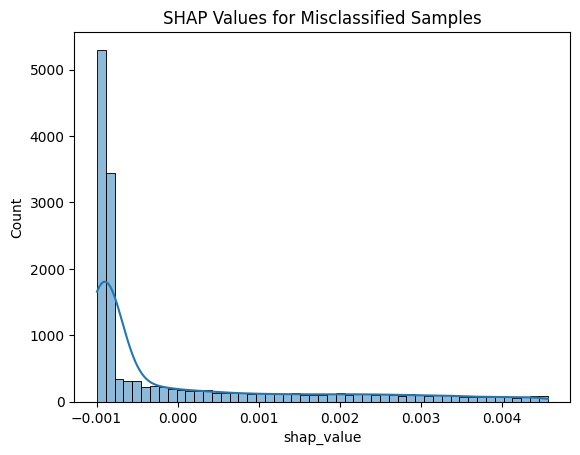

In [25]:
# Add misclassification information
test_set_df['misclassified'] = (test_set_df['attack_prediction'].round() != test_set_df['is_member'])

# Analyze SHAP values for misclassified samples
misclassified_samples = test_set_df[test_set_df['misclassified']]
sns.histplot(misclassified_samples['shap_value'], kde=True)
plt.title('SHAP Values for Misclassified Samples')
plt.show()


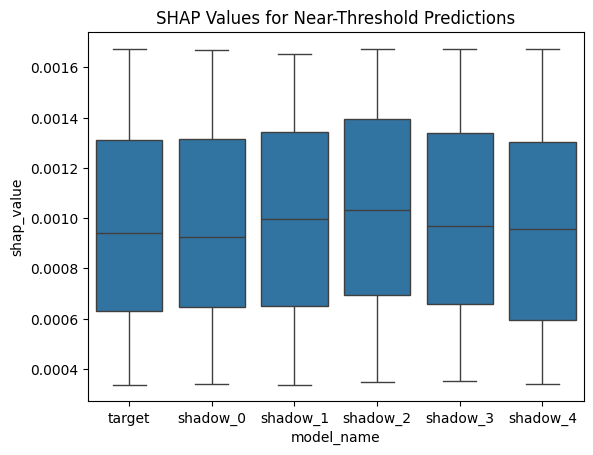

In [26]:
# Filter predictions near decision threshold (e.g., 0.4 to 0.6)
near_threshold = test_set_df[(test_set_df['prediction'] > 0.4) & (test_set_df['prediction'] < 0.6)]
sns.boxplot(x='model_name', y='shap_value', data=near_threshold)
plt.title('SHAP Values for Near-Threshold Predictions')
plt.show()


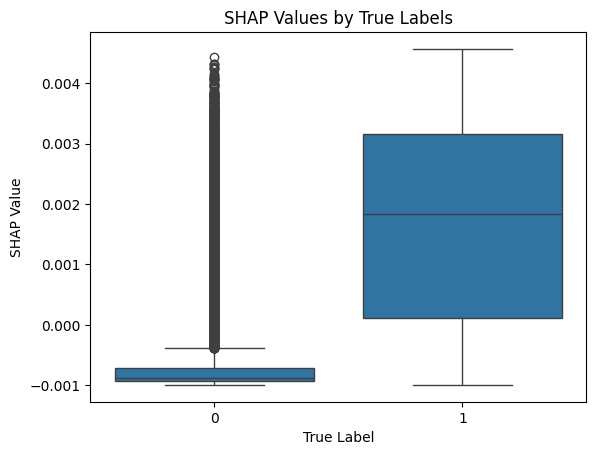

In [27]:
sns.boxplot(x='true_label', y='shap_value', data=test_set_df)
plt.title('SHAP Values by True Labels')
plt.ylabel('SHAP Value')
plt.xlabel('True Label')
plt.show()


Average SHAP Value by Model:
model_name
shadow_0    0.000032
shadow_1    0.000006
shadow_2   -0.000040
shadow_3   -0.000071
shadow_4    0.000045
target      0.000010
Name: shap_value, dtype: float64


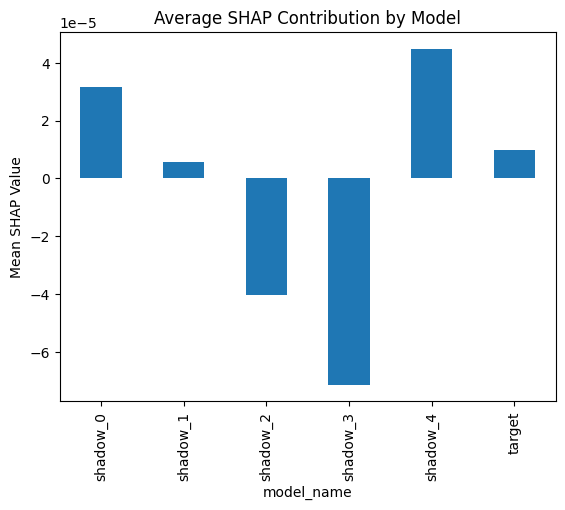

In [28]:
model_contributions = test_set_df.groupby('model_name')['shap_value'].mean()
print("Average SHAP Value by Model:")
print(model_contributions)

model_contributions.plot(kind='bar', title='Average SHAP Contribution by Model')
plt.ylabel('Mean SHAP Value')
plt.show()


In [29]:
test_set_df

,prediction,is_member,true_label,model_name,sample_index,data_split,attack_prediction,shap_value,misclassified
0,0.545927,0,1,target,0,train,0.488961,0.001298,False
1,0.655772,0,0,target,1,train,0.489735,0.002071,False
2,0.580456,0,0,target,2,train,0.489201,0.001537,False
3,0.053128,0,0,target,3,train,0.486677,-0.000987,False
4,0.592701,0,1,target,4,train,0.489287,0.001623,False
...,...,...,...,...,...,...,...,...,...
29995,0.404607,1,0,shadow_4,7543,test,0.488029,0.000365,True
29996,0.044434,1,0,shadow_4,2179,test,0.486687,-0.000977,True
29997,0.081991,1,0,shadow_4,1110,test,0.486670,-0.000993,True
29998,0.001895,1,0,shadow_4,3481,test,0.486799,-0.000865,True
